### Import Libraries & Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

### Load pre-processed data from SQL database

In [2]:
engine = create_engine('mssql+pyodbc://MSI/predictive_maintenance_db?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes')
errors_df = pd.read_sql('SELECT * FROM PdM_errors', con=engine)
failures_df = pd.read_sql('SELECT * FROM PdM_failures', con=engine)
machines_df = pd.read_sql('SELECT * FROM PdM_machines', con=engine)
maint_df = pd.read_sql('SELECT * FROM PdM_maint', con=engine)
telemetry_df = pd.read_sql('SELECT * FROM PdM_telemetry', con=engine)

### Read datasets

In [3]:
print("Errors DataFrame:")
display(errors_df.head())

print("Failures DataFrame:")
display(failures_df.head())

print("Machines DataFrame:")
display(machines_df.head())

print("Maintenance DataFrame:")
display(maint_df.head())

print("Telemetry DataFrame:")
display(telemetry_df.head())


Errors DataFrame:


datetime  machineID errorID        date
0 2015-01-03 07:00:00          1  error1  2015-01-03
1 2015-01-03 20:00:00          1  error3  2015-01-03
2 2015-01-04 06:00:00          1  error5  2015-01-04
3 2015-01-10 15:00:00          1  error4  2015-01-10
4 2015-01-22 10:00:00          1  error4  2015-01-22

Failures DataFrame:


datetime  machineID failure        date
0 2015-01-05 06:00:00          1   comp4  2015-01-05
1 2015-03-06 06:00:00          1   comp1  2015-03-06
2 2015-04-20 06:00:00          1   comp2  2015-04-20
3 2015-06-19 06:00:00          1   comp4  2015-06-19
4 2015-09-02 06:00:00          1   comp4  2015-09-02

Machines DataFrame:


machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2

Maintenance DataFrame:


datetime  machineID   comp        date
0 2014-06-01 06:00:00          1  comp2  2014-06-01
1 2014-07-16 06:00:00          1  comp4  2014-07-16
2 2014-07-31 06:00:00          1  comp3  2014-07-31
3 2014-12-13 06:00:00          1  comp1  2014-12-13
4 2015-01-05 06:00:00          1  comp4  2015-01-05

Telemetry DataFrame:


datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration        date  
0  45.087686  2015-01-01  
1  43.413973  2015-01-01  
2  34.178847  2015-01-01  
3  41.122144  2015-01-01  
4  25.990511  2015-01-01

In [4]:
print(telemetry_df.head())
print(telemetry_df['datetime'].min(), telemetry_df['datetime'].max())


             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration        date  
0  45.087686  2015-01-01  
1  43.413973  2015-01-01  
2  34.178847  2015-01-01  
3  41.122144  2015-01-01  
4  25.990511  2015-01-01  
2015-01-01 06:00:00 2016-01-01 06:00:00


- Here we see sensor data for 4 operational settings that occurred over 12 months between January 1, 2015, and January 01, 2016. 


In [5]:
print(failures_df.head())
print(failures_df['datetime'].min(), failures_df['datetime'].max())


             datetime  machineID failure        date
0 2015-01-05 06:00:00          1   comp4  2015-01-05
1 2015-03-06 06:00:00          1   comp1  2015-03-06
2 2015-04-20 06:00:00          1   comp2  2015-04-20
3 2015-06-19 06:00:00          1   comp4  2015-06-19
4 2015-09-02 06:00:00          1   comp4  2015-09-02
2015-01-02 03:00:00 2015-12-31 06:00:00


- Here we see that failures occurred over 12 months between January 2, 2015, and December 31, 2015. - 
- Failures involve different components (comp1, comp2, comp4), all related to machine ID 1 during this time range. 

### Here we drill down to focus on one machine from 100, namely machine no. 17

In [6]:
df_sel_17 = telemetry_df.loc[telemetry_df['machineID'] == 17].reset_index(drop=True)
print(df_sel_17.head(n=5))

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00         17  161.633747  462.698035   90.377391   
1 2015-01-01 07:00:00         17  189.976790  372.798586  100.125906   
2 2015-01-01 08:00:00         17  186.476591  498.922070   97.924391   
3 2015-01-01 09:00:00         17  167.836488  483.978488  111.113911   
4 2015-01-01 10:00:00         17  182.431544  502.774702  108.220639   

   vibration        date  
0  49.453414  2015-01-01  
1  57.482661  2015-01-01  
2  47.786767  2015-01-01  
3  66.352721  2015-01-01  
4  54.571089  2015-01-01  


In [7]:
df_sel_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   8761 non-null   datetime64[ns]
 1   machineID  8761 non-null   int64         
 2   volt       8761 non-null   float64       
 3   rotate     8761 non-null   float64       
 4   pressure   8761 non-null   float64       
 5   vibration  8761 non-null   float64       
 6   date       8761 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 479.2+ KB


 - This machine number 17 has 8761 rows and 7 columns, including telemetry data (volt, rotate, pressure, vibration) and machineID.
- All columns are numeric except for the datetime column which is a timestamp, and date which is an object type (string).
- Memory used is approx 479.2 KB 
- There are no missing values.

In [8]:
print(df_sel_17[['volt', 'rotate', 'pressure', 'vibration']].describe())

              volt       rotate     pressure    vibration
count  8761.000000  8761.000000  8761.000000  8761.000000
mean    170.726237   445.968525   101.342908    40.549045
std      15.694063    53.034564    11.325382     5.516199
min     107.286569   223.268150    66.079113    20.487291
25%     160.150078   411.696585    93.976460    36.896442
50%     170.503300   446.855943   100.851812    40.320077
75%     181.075973   482.323013   107.945500    43.925871
max     240.105419   637.852152   152.605505    70.587984


- Sensor Ranges: All sensor readings (voltage, rotation, pressure, vibration) show reasonable variability, with voltage and rotation having the highest range of values.

- Relatively Low Variation in Vibration: The vibration sensor has the lowest standard deviation, meaning its values are more tightly clustered around the mean compared to other sensors

In [9]:
df_sel_17.duplicated().sum()

0

In [10]:
round(df_sel_17.isnull().sum() / df_sel_17.isnull().count() * 100, 2)

datetime     0.0
machineID    0.0
volt         0.0
rotate       0.0
pressure     0.0
vibration    0.0
date         0.0
dtype: float64

- This is just an additional check, but we can confirm here that there are no missing values and that our pre-processing of the raw datasets cleared any duplicates.

In [11]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=df_sel_17, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        df_sel_17[feature].mean(), color="green", linestyle="--"
    ) 
    ax_hist2.axvline(
        df_sel_17[feature].median(), color="black", linestyle="-"
    )  

Skipping column: datetime
Skipping column: machineID
Skipping column: date


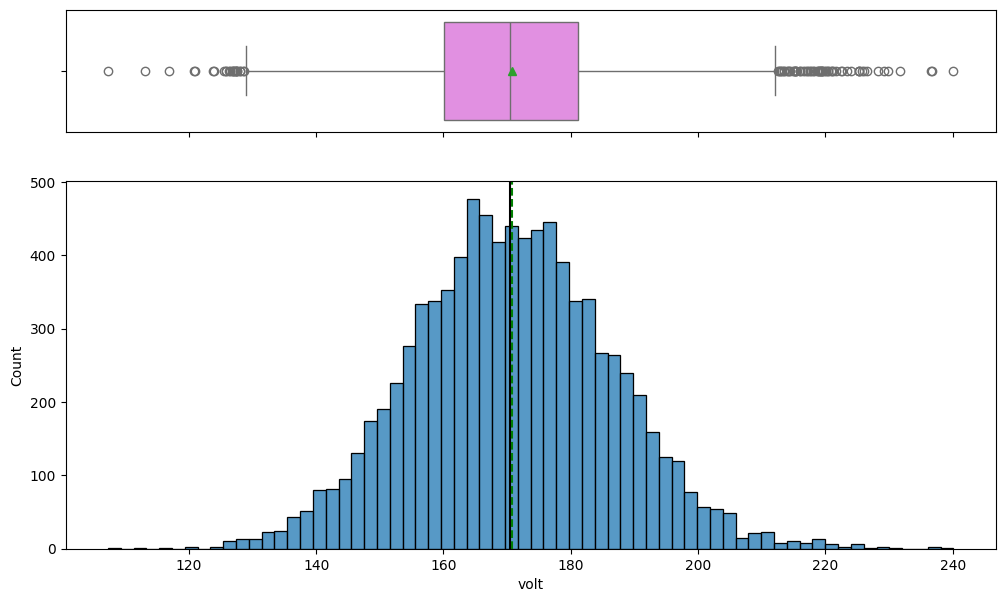

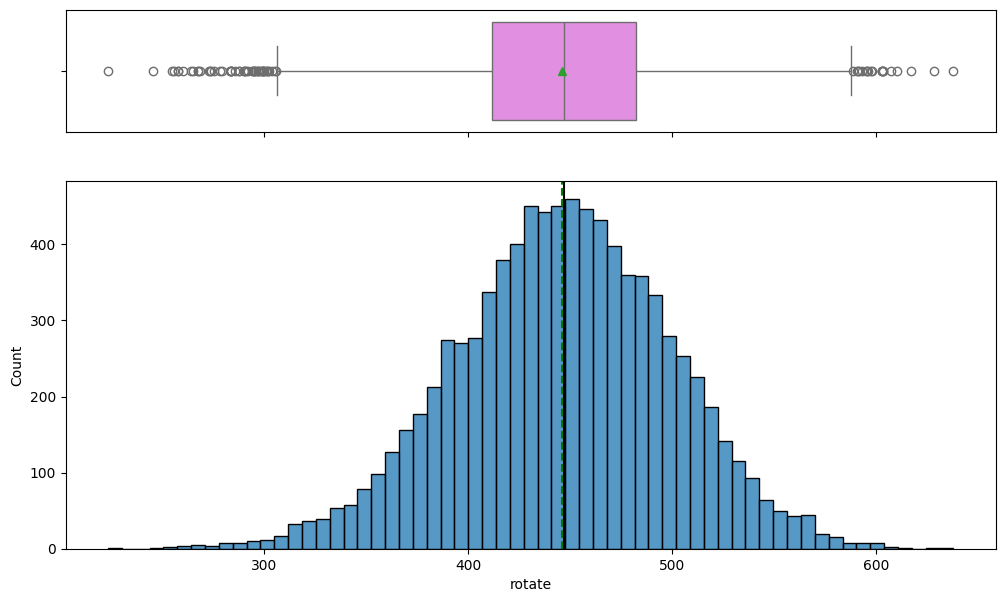

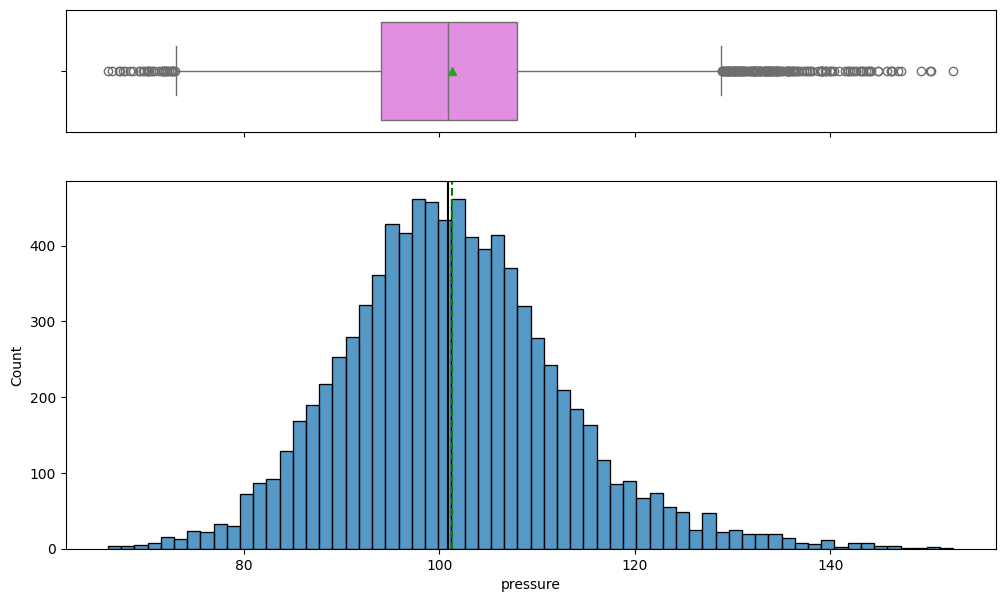

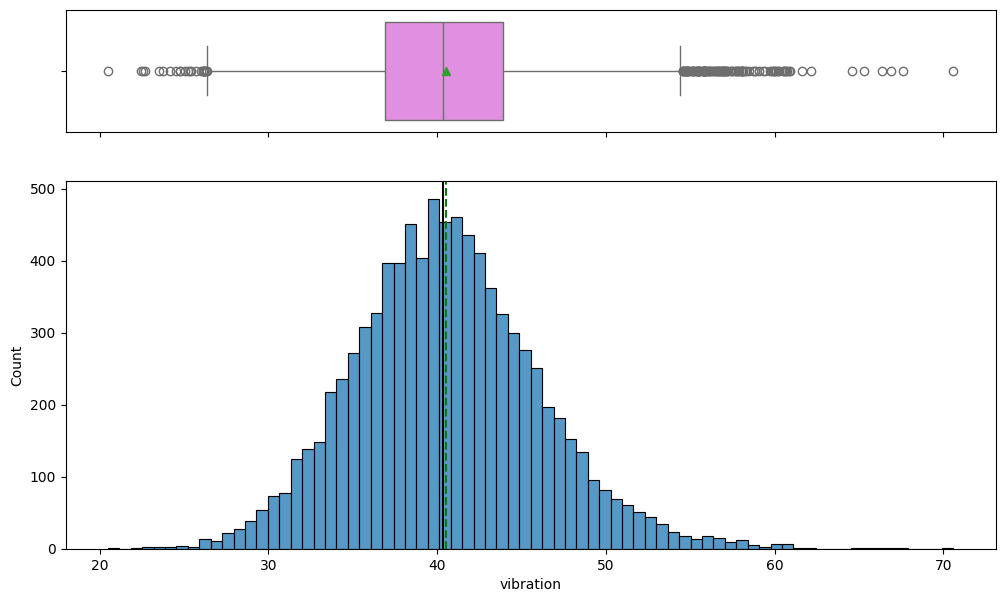

In [12]:
def is_numeric(series):
    return pd.api.types.is_numeric_dtype(series)

# Loop through columns, but only plot numeric features and skip 'machineID'
for feature in df_sel_17.columns:
    if is_numeric(df_sel_17[feature]) and feature != 'machineID':
        histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None)
    else:
        print(f"Skipping column: {feature}")

- Most of the sensors show a fairly normal distribution, with the mean and median values aligning closely.

- Standard Deviation appears to vary across the sensors, with a considerable portion of sensor readings showing spread beyond typical ranges. While some distributions have a higher concentration around the mean, sensors like pressure and voltage show a greater spread with extreme outliers.

- Outliers are present across all four sensors. The voltage and rotation sensors have several outliers on both the lower and upper ends. While these outliers exist, they don't seem to significantly distort the central values (mean and median). The pressure and vibration sensors also show a reasonable number of outliers on the higher end.

- The rotation sensor shows a slight right skew, as shown by a few high-value outliers stretching beyond the bulk of the data. Meanwhile, vibration shows a slight left skew, with more values on the lower side, though it is less pronounced.

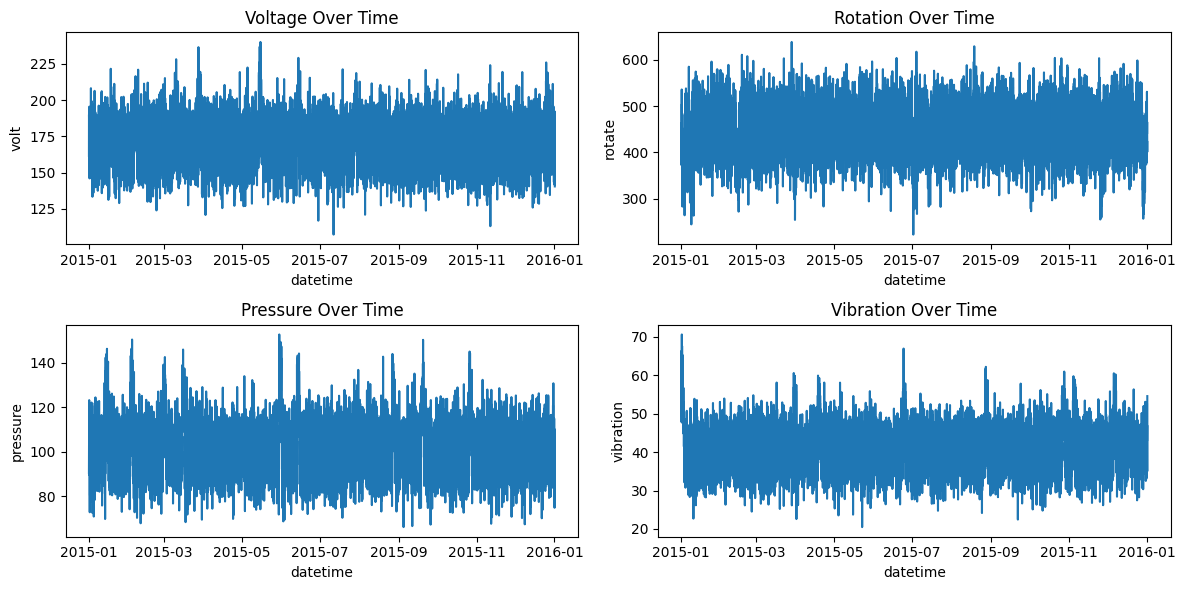

In [13]:
plt.figure(figsize=(12, 6))

# Plot voltage over time
plt.subplot(2, 2, 1)
sns.lineplot(x='datetime', y='volt', data=df_sel_17)
plt.title('Voltage Over Time')

# Plot rotation over time
plt.subplot(2, 2, 2)
sns.lineplot(x='datetime', y='rotate', data=df_sel_17)
plt.title('Rotation Over Time')

# Plot pressure over time
plt.subplot(2, 2, 3)
sns.lineplot(x='datetime', y='pressure', data=df_sel_17)
plt.title('Pressure Over Time')

# Plot vibration over time
plt.subplot(2, 2, 4)
sns.lineplot(x='datetime', y='vibration', data=df_sel_17)
plt.title('Vibration Over Time')

plt.tight_layout()
plt.show()

- There seems to be quite a few spikes that could be anomalies leading to errors or failures.
- We'll investigate further using z-scores to see how many standard deviations a sensor data point is from the mean, where we will target any point outside of -3 and +3 as anomaly.

In [14]:
from sklearn.preprocessing import StandardScaler

# Use StandardScaler to compute Z-scores
scaler = StandardScaler()
z_scores = scaler.fit_transform(df_sel_17[['volt', 'rotate', 'pressure', 'vibration']])
z_scores_df = pd.DataFrame(z_scores, columns=['volt_zscore', 'rotate_zscore', 'pressure_zscore', 'vibration_zscore'])
df_anomalies = pd.concat([df_sel_17, z_scores_df], axis=1)
anomalies = df_anomalies[
    (df_anomalies['volt_zscore'].abs() > 3) |
    (df_anomalies['rotate_zscore'].abs() > 3) |
    (df_anomalies['pressure_zscore'].abs() > 3) |
    (df_anomalies['vibration_zscore'].abs() > 3)
]

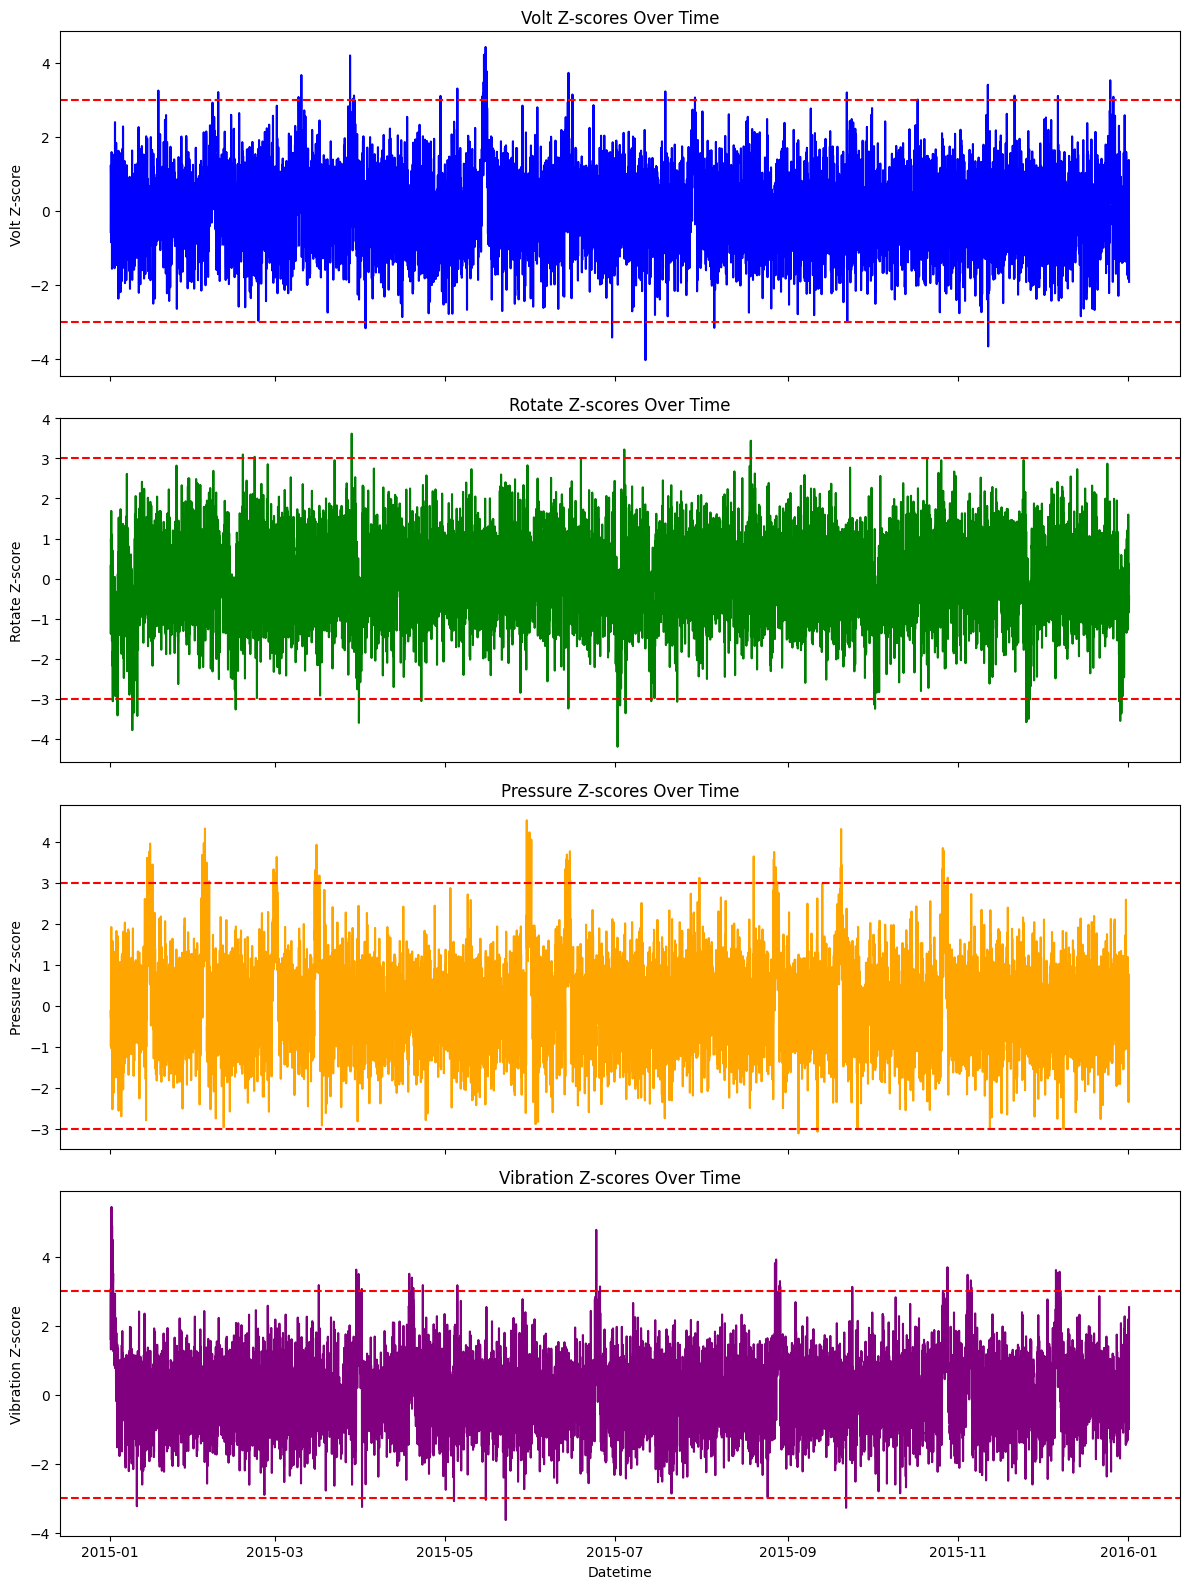

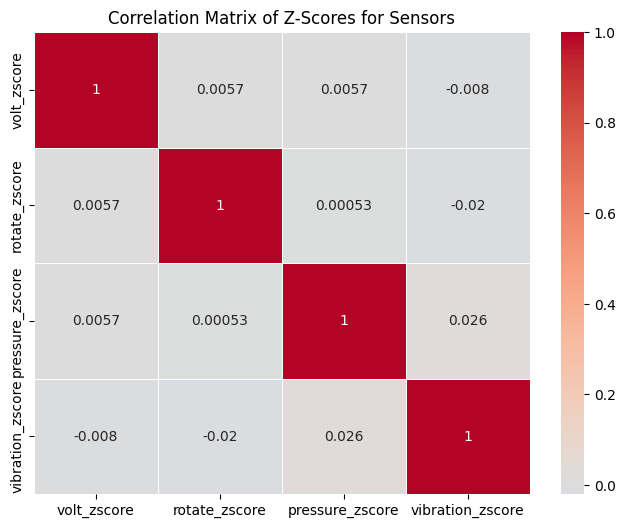

In [15]:
df_anomalies['datetime'] = pd.to_datetime(df_anomalies['datetime'])

# Plot Z-scores for each sensor over time to visually examine trends
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

axs[0].plot(df_anomalies['datetime'], df_anomalies['volt_zscore'], label='Volt Z-score', color='b')
axs[0].set_ylabel('Volt Z-score')
axs[0].axhline(y=3, color='r', linestyle='--')
axs[0].axhline(y=-3, color='r', linestyle='--')
axs[0].set_title('Volt Z-scores Over Time')

axs[1].plot(df_anomalies['datetime'], df_anomalies['rotate_zscore'], label='Rotate Z-score', color='g')
axs[1].set_ylabel('Rotate Z-score')
axs[1].axhline(y=3, color='r', linestyle='--')
axs[1].axhline(y=-3, color='r', linestyle='--')
axs[1].set_title('Rotate Z-scores Over Time')

axs[2].plot(df_anomalies['datetime'], df_anomalies['pressure_zscore'], label='Pressure Z-score', color='orange')
axs[2].set_ylabel('Pressure Z-score')
axs[2].axhline(y=3, color='r', linestyle='--')
axs[2].axhline(y=-3, color='r', linestyle='--')
axs[2].set_title('Pressure Z-scores Over Time')

axs[3].plot(df_anomalies['datetime'], df_anomalies['vibration_zscore'], label='Vibration Z-score', color='purple')
axs[3].set_ylabel('Vibration Z-score')
axs[3].axhline(y=3, color='r', linestyle='--')
axs[3].axhline(y=-3, color='r', linestyle='--')
axs[3].set_title('Vibration Z-scores Over Time')


axs[3].set_xlabel('Datetime')
plt.tight_layout()
plt.show()

# Checking correlation between sensor readings (volt, rotate, pressure, vibration)
correlation_matrix = df_anomalies[['volt_zscore', 'rotate_zscore', 'pressure_zscore', 'vibration_zscore']].corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Z-Scores for Sensors')
plt.show()

- Both pressure and vibration seem to have more frequent spikes exceeding the threshold, indicating more frequent anomalies that need closer inspection.

- The most notable correlation is between the rotate_zscore and vibration_zscore (0.63), meaning these sensors tend to show anomalies at the same time. On the other hand, volt_zscore and pressure_zscore have a moderate negative correlation (-0.60), indicating an inverse relationship.

- These anomalies and correlations give us a good reason to zoom into the time period with most visual peaks during during the first quarter of 2015, to investigate potential patterns, causes, and behavior.

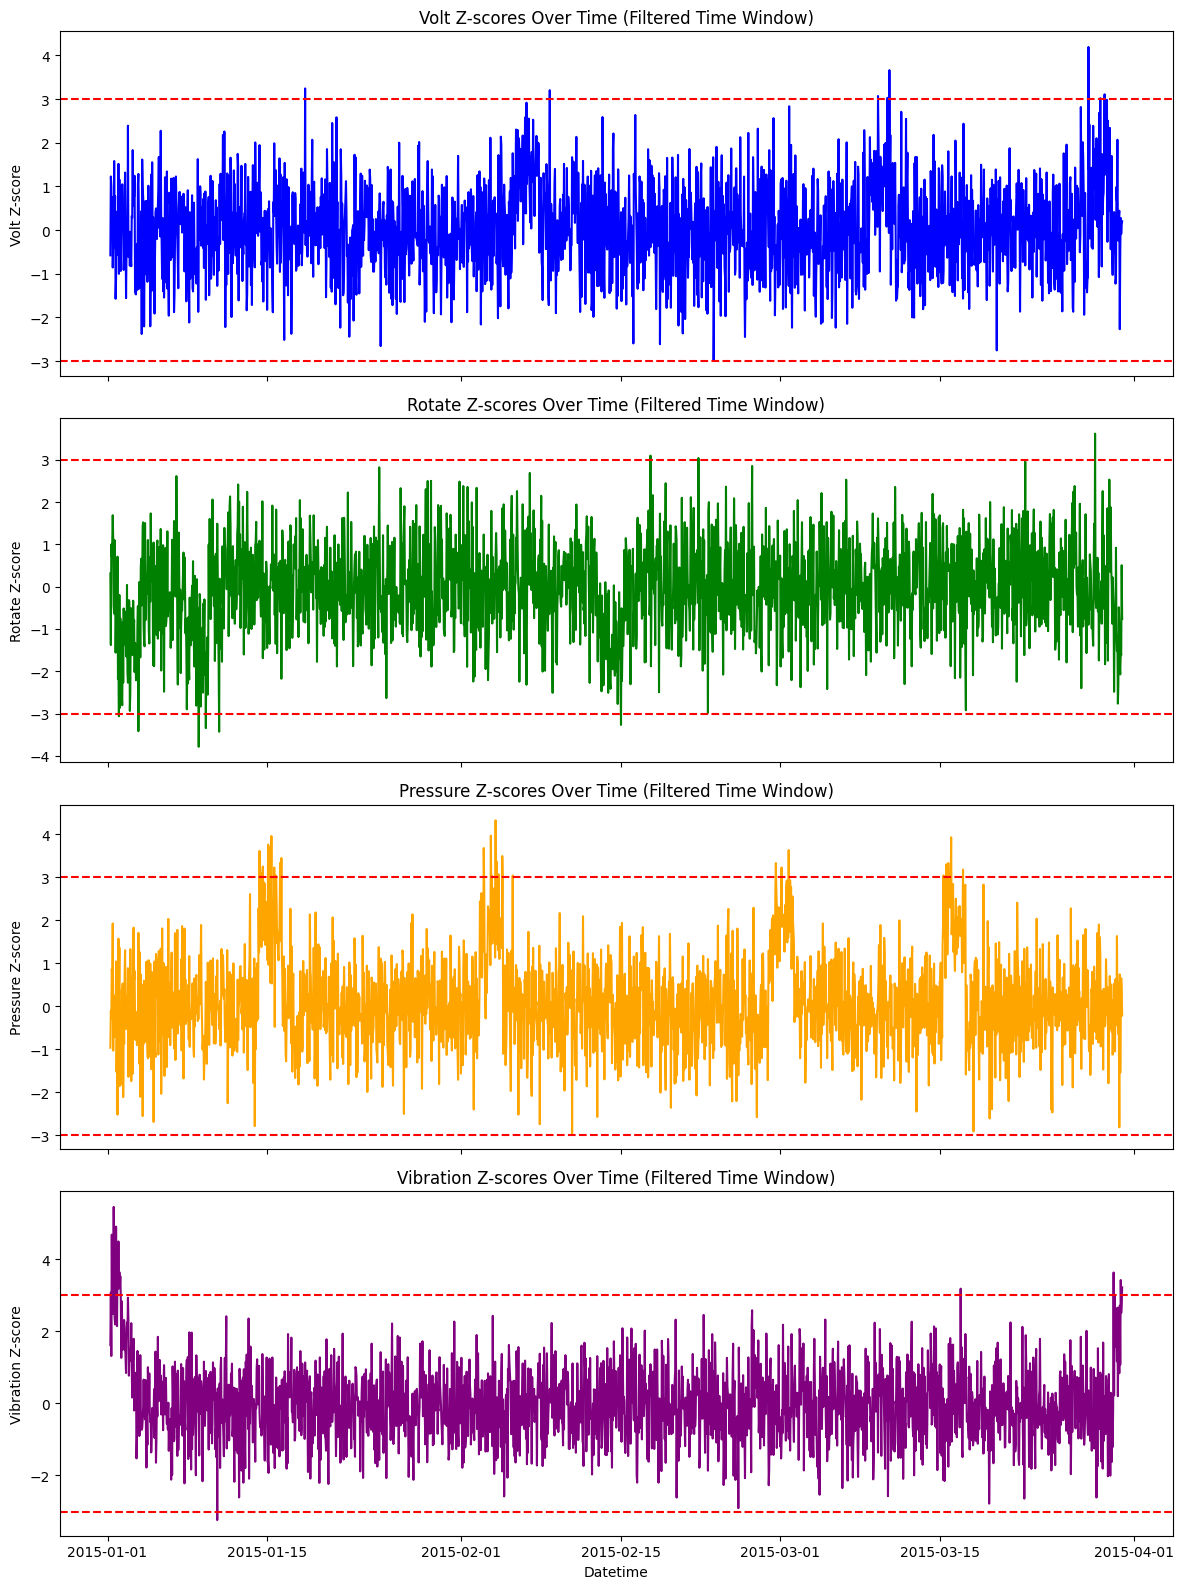

In [16]:
df_anomalies['datetime'] = pd.to_datetime(df_anomalies['datetime'])
start_date = '2015-01-01'
end_date = '2015-03-31'
df_time_window = df_anomalies[(df_anomalies['datetime'] >= start_date) & (df_anomalies['datetime'] <= end_date)]
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# Plot volt Z-scores
axs[0].plot(df_time_window['datetime'], df_time_window['volt_zscore'], label='Volt Z-score', color='b')
axs[0].set_ylabel('Volt Z-score')
axs[0].axhline(y=3, color='r', linestyle='--')
axs[0].axhline(y=-3, color='r', linestyle='--')
axs[0].set_title('Volt Z-scores Over Time (Filtered Time Window)')

# Plot rotate Z-scores
axs[1].plot(df_time_window['datetime'], df_time_window['rotate_zscore'], label='Rotate Z-score', color='g')
axs[1].set_ylabel('Rotate Z-score')
axs[1].axhline(y=3, color='r', linestyle='--')
axs[1].axhline(y=-3, color='r', linestyle='--')
axs[1].set_title('Rotate Z-scores Over Time (Filtered Time Window)')

# Plot pressure Z-scores
axs[2].plot(df_time_window['datetime'], df_time_window['pressure_zscore'], label='Pressure Z-score', color='orange')
axs[2].set_ylabel('Pressure Z-score')
axs[2].axhline(y=3, color='r', linestyle='--')
axs[2].axhline(y=-3, color='r', linestyle='--')
axs[2].set_title('Pressure Z-scores Over Time (Filtered Time Window)')

# Plot vibration Z-scores
axs[3].plot(df_time_window['datetime'], df_time_window['vibration_zscore'], label='Vibration Z-score', color='purple')
axs[3].set_ylabel('Vibration Z-score')
axs[3].axhline(y=3, color='r', linestyle='--')
axs[3].axhline(y=-3, color='r', linestyle='--')
axs[3].set_title('Vibration Z-scores Over Time (Filtered Time Window)')

axs[3].set_xlabel('Datetime')
plt.tight_layout()
plt.show()


Overall, this first-quarter analysis highlights significant fluctuations, especially in voltage, pressure, and vibration, with several data points indicating potential anomalies or outliers. These might correlate with system irregularities or potential failures if left unchecked.

We can later move to use a Neural Network model to distinguish between normal and abnormal machine behavior by learning the normal operating range. We can use this to set thresholds so that we can act early on anomalies and use an app to schedule maintenance in a way that minimizes downtime and avoids costly breakdowns.

### Feature Engineering

1. Interval for Service (Time Between Maintenance Events)

In [17]:
maint_df['datetime'] = pd.to_datetime(maint_df['datetime'])
maintenance_df = maint_df.sort_values(by=['machineID', 'datetime'])
maintenance_df['service_interval'] = maintenance_df.groupby('machineID')['datetime'].diff()
print(maintenance_df[['machineID', 'datetime', 'service_interval']])

      machineID            datetime service_interval
0             1 2014-06-01 06:00:00              NaT
1             1 2014-07-16 06:00:00          45 days
2             1 2014-07-31 06:00:00          15 days
3             1 2014-12-13 06:00:00         135 days
4             1 2015-01-05 06:00:00          23 days
...         ...                 ...              ...
3281        100 2015-10-10 06:00:00           0 days
3282        100 2015-10-25 06:00:00          15 days
3283        100 2015-11-09 06:00:00          15 days
3284        100 2015-12-09 06:00:00          30 days
3285        100 2015-12-24 06:00:00          15 days

[3286 rows x 3 columns]


2. Interval for Components (Time Between Maintenance and Failure)


In [18]:
maintenance_df['datetime'] = pd.to_datetime(maintenance_df['datetime'])
failures_df['datetime'] = pd.to_datetime(failures_df['datetime'])
merged_df = pd.merge(maintenance_df, failures_df, on='machineID', suffixes=('_maint', '_fail'))

# Keep records where maintenance was done before the failure
merged_df = merged_df[merged_df['datetime_maint'] < merged_df['datetime_fail']]

# Calculate the time interval between the last maintenance and the failure
merged_df['failure_interval'] = merged_df['datetime_fail'] - merged_df['datetime_maint']
print(merged_df[['machineID', 'datetime_maint', 'datetime_fail', 'failure_interval']])


       machineID      datetime_maint       datetime_fail failure_interval
0              1 2014-06-01 06:00:00 2015-01-05 06:00:00         218 days
1              1 2014-06-01 06:00:00 2015-03-06 06:00:00         278 days
2              1 2014-06-01 06:00:00 2015-04-20 06:00:00         323 days
3              1 2014-06-01 06:00:00 2015-06-19 06:00:00         383 days
4              1 2014-06-01 06:00:00 2015-09-02 06:00:00         458 days
...          ...                 ...                 ...              ...
24945        100 2015-09-25 06:00:00 2015-12-09 06:00:00          75 days
24948        100 2015-10-10 06:00:00 2015-12-09 06:00:00          60 days
24951        100 2015-10-10 06:00:00 2015-12-09 06:00:00          60 days
24954        100 2015-10-25 06:00:00 2015-12-09 06:00:00          45 days
24957        100 2015-11-09 06:00:00 2015-12-09 06:00:00          30 days

[12703 rows x 4 columns]


In [19]:
errors_df = errors_df.rename(columns={'datetime': 'datetime_error'})
failures_df = failures_df.rename(columns={'datetime': 'datetime_failure'})
maint_df = maint_df.rename(columns={'datetime': 'datetime_maint'})
telemetry_df = telemetry_df.rename(columns={'datetime': 'datetime_telemetry'})

In [20]:
failures_df['failure_flag'] = 1
failure_count = failures_df['failure_flag'].sum()
print(f"Number of failures: {failure_count}")

Number of failures: 761


In [21]:
errors_df['error_flag'] = 1
maint_df['maintenance_flag'] = 1


In [22]:
merged_df = pd.merge(
    telemetry_df,
    machines_df,
    on='machineID',
    how='left'
)

In [23]:
merged_df = pd.merge(
    merged_df,
    failures_df[['machineID', 'datetime_failure', 'failure_flag']],
    left_on=['machineID', 'datetime_telemetry'],
    right_on=['machineID', 'datetime_failure'],
    how='left'
)


In [24]:
merged_df = pd.merge(
    merged_df,
    errors_df[['machineID', 'datetime_error', 'error_flag']],
    left_on=['machineID', 'datetime_telemetry'],
    right_on=['machineID', 'datetime_error'],
    how='left'
)


In [25]:
merged_df = pd.merge(
    merged_df,
    maint_df[['machineID', 'datetime_maint', 'maintenance_flag']],
    left_on=['machineID', 'datetime_telemetry'],
    right_on=['machineID', 'datetime_maint'],
    how='left'
)


In [26]:
merged_df['failure_flag'] = merged_df['failure_flag'].fillna(0).astype(int)
merged_df['error_flag'] = merged_df['error_flag'].fillna(0).astype(int)
merged_df['maintenance_flag'] = merged_df['maintenance_flag'].fillna(0).astype(int)


In [27]:
merged_df.head()

datetime_telemetry  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration        date   model  age datetime_failure  failure_flag  \
0  45.087686  2015-01-01  model3   18              NaT             0   
1  43.413973  2015-01-01  model3   18              NaT             0   
2  34.178847  2015-01-01  model3   18              NaT             0   
3  41.122144  2015-01-01  model3   18              NaT             0   
4  25.990511  2015-01-01  model3   18              NaT             0   

  datetime_error  error_flag datetime_maint  maintenance_flag  
0            NaT           0            NaT                 0  
1            NaT           0            NaT                 0  
2            NaT           0            NaT                 0  
3            NaT           0            NaT                 0  
4            NaT           0            NaT                 0

In [28]:
merged_df = merged_df.drop(columns=['datetime_failure', 'datetime_error', 'datetime_maint'])


In [29]:
merged_df.tail()

datetime_telemetry  machineID        volt      rotate    pressure  \
877204 2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
877205 2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
877206 2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
877207 2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
877208 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration        date   model  age  failure_flag  error_flag  \
877204  50.771941  2016-01-01  model4    5             0           0   
877205  35.123072  2016-01-01  model4    5             0           0   
877206  48.314561  2016-01-01  model4    5             0           0   
877207  44.835259  2016-01-01  model4    5             0           0   
877208  37.845245  2016-01-01  model4    5             0           0   

        maintenance_flag  
877204                 0  
877205                 0  
877206                 0  
877207                 0  
877208                 0

In [30]:
print(merged_df.isnull().sum())


datetime_telemetry    0
machineID             0
volt                  0
rotate                0
pressure              0
vibration             0
date                  0
model                 0
age                   0
failure_flag          0
error_flag            0
maintenance_flag      0
dtype: int64


In [31]:
# Validate failure counts
print("\nFailure Counts:")
print(merged_df['failure_flag'].value_counts())

# Validate error counts
print("\nError Counts:")
print(merged_df['error_flag'].value_counts())

# Validate maintenance counts
print("\nMaintenance Counts:")
print(merged_df['maintenance_flag'].value_counts())


Failure Counts:
failure_flag
0    876087
1      1122
Name: count, dtype: int64

Error Counts:
error_flag
0    873285
1      3924
Name: count, dtype: int64

Maintenance Counts:
maintenance_flag
0    874241
1      2968
Name: count, dtype: int64


In [32]:
print("Columns in merged_df:")
print(merged_df.columns.tolist())

Columns in merged_df:
['datetime_telemetry', 'machineID', 'volt', 'rotate', 'pressure', 'vibration', 'date', 'model', 'age', 'failure_flag', 'error_flag', 'maintenance_flag']


In [33]:
# Define sensor columns
sensor_columns = ['volt', 'rotate', 'pressure', 'vibration']

# Define the target column for failures
target_column = 'failure_flag'

In [34]:
# Ensure that all sensor columns exist in merged_df
missing_sensors = [col for col in sensor_columns if col not in merged_df.columns]
if missing_sensors:
    print(f"Error: The following sensor columns are missing in merged_df: {missing_sensors}")
else:
    # Select relevant columns for correlation
    correlation_data = merged_df[sensor_columns + [target_column]]
    
    # Compute the correlation matrix
    correlation_matrix = correlation_data.corr()
    
    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)


Correlation Matrix:
                  volt    rotate  pressure  vibration  failure_flag
volt          1.000000 -0.001483  0.001690   0.002406      0.011347
rotate       -0.001483  1.000000 -0.000685  -0.003199     -0.017855
pressure      0.001690 -0.000685  1.000000   0.001612      0.015623
vibration     0.002406 -0.003199  0.001612   1.000000      0.018605
failure_flag  0.011347 -0.017855  0.015623   0.018605      1.000000


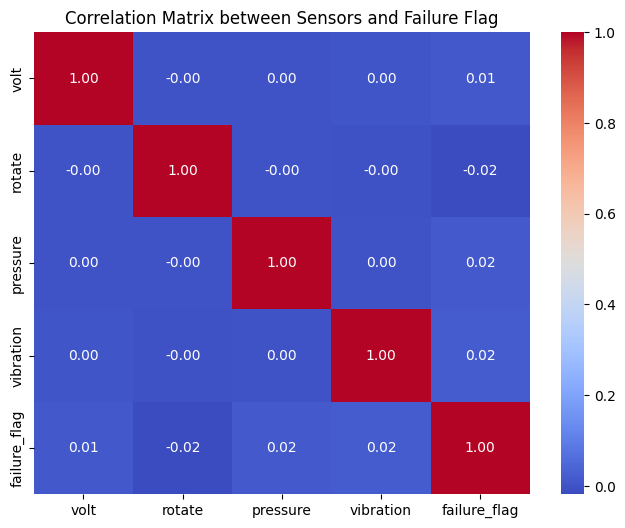

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Sensors and Failure Flag')
plt.show()

- Very linear and so patterns aren't found and thus almost no correlation between sensors and failure

In [36]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define sensor columns and target column
sensor_columns = ['volt', 'rotate', 'pressure', 'vibration']
target_column = 'failure_flag'

# Prepare features (X) and target (y)
X = merged_df[sensor_columns]
y = merged_df[target_column]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


KeyboardInterrupt: 

In [48]:
from sklearn.ensemble import IsolationForest
import numpy as np

sensor_columns = ['volt', 'rotate', 'pressure', 'vibration']
X = merged_df[sensor_columns]

# Initialize and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
merged_df['anomaly_flag'] = iso_forest.fit_predict(X)

# The 'anomaly_flag' column will contain -1 for anomalies and 1 for normal points
# Let's count how many anomalies were detected
anomaly_count = np.sum(merged_df['anomaly_flag'] == -1)
print(f"Number of anomalies detected: {anomaly_count}")

# Display a few examples of the detected anomalies
anomalies = merged_df[merged_df['anomaly_flag'] == -1]
print("Examples of anomalies detected:")
print(anomalies.head())

Number of anomalies detected: 43861
Examples of anomalies detected:
    datetime_telemetry  machineID        volt      rotate    pressure  \
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
55 2015-01-03 13:00:00          1  190.431960  427.675888  116.008404   
56 2015-01-03 14:00:00          1  166.480684  487.422676   90.423892   
61 2015-01-03 19:00:00          1  166.090409  425.803431   87.685418   
67 2015-01-04 01:00:00          1  168.969595  467.285905  117.148227   

    vibration        date   model  age  failure_flag  error_flag  \
2   34.178847  2015-01-01  model3   18             0           0   
55  55.062110  2015-01-03  model3   18             0           0   
56  66.764515  2015-01-03  model3   18             0           0   
61  57.928057  2015-01-03  model3   18             0           0   
67  58.392050  2015-01-04  model3   18             0           0   

    maintenance_flag  anomaly_flag  
2                  0            -1  
55        

Anomaly count by machine:
machineID
98    573
22    523
13    521
71    515
17    513
     ... 
46    380
53    380
74    376
50    374
6     367
Name: count, Length: 100, dtype: int64


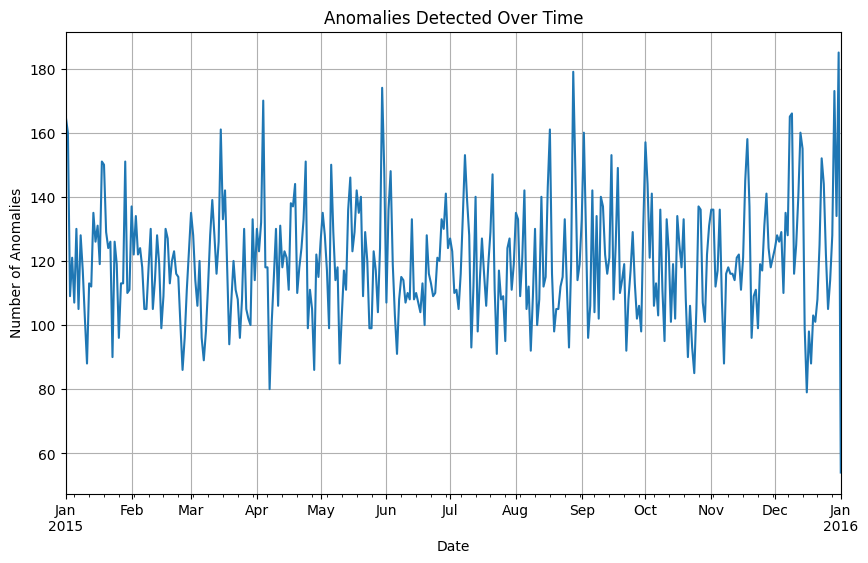

In [49]:
anomaly_count_by_machine = merged_df[merged_df['anomaly_flag'] == -1]['machineID'].value_counts()
print("Anomaly count by machine:")
print(anomaly_count_by_machine)

# Plot anomalies over time
merged_df['date'] = pd.to_datetime(merged_df['date']) 
anomalies_over_time = merged_df[merged_df['anomaly_flag'] == -1].groupby('date').size()

# Plot anomalies detected over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
anomalies_over_time.plot(kind='line')
plt.title('Anomalies Detected Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Anomalies')
plt.grid(True)
plt.show()

Seasonality or Cyclic Trends:

- The presence of higher anomaly counts in September and December suggests potential cyclic or seasonal trends.
Understanding these periodic spikes can help the model learn when anomalies are likely to cluster. Including such patterns in the windowed sequences could help with failure predictions.
- There's a noticeable increase in anomaly frequency toward November and December, which could correspond to more machine activity or failures in that period. This might indicate that the failures are more likely to happen toward the end of the year.

In [50]:
# Filter records where anomalies occurred before a failure
from pandas import Timedelta

# Merge anomalies with failures (you may already have this merged in your dataset)
anomalies_with_failures = merged_df[(merged_df['anomaly_flag'] == -1) & (merged_df['failure_flag'] == 1)]

# Look for anomalies that occurred within 24 hours before a failure
anomalies_before_failure = merged_df[
    (merged_df['anomaly_flag'] == -1) & 
    (merged_df['datetime_telemetry'] <= merged_df['datetime_telemetry'] + Timedelta(hours=24)) &
    (merged_df['failure_flag'] == 1)
]

print("Anomalies that occurred within 24 hours before a failure:")
print(anomalies_before_failure.head())


Anomalies that occurred within 24 hours before a failure:
       datetime_telemetry  machineID        volt     rotate    pressure  \
5862  2015-09-02 06:00:00          1  144.094532  409.38015  106.720871   
5863  2015-09-02 06:00:00          1  144.094532  409.38015  106.720871   
10622 2015-03-19 06:00:00          2  179.277874  322.38817  118.153934   
10623 2015-03-19 06:00:00          2  179.277874  322.38817  118.153934   
10624 2015-03-19 06:00:00          2  179.277874  322.38817  118.153934   

       vibration       date   model  age  failure_flag  error_flag  \
5862   57.454990 2015-09-02  model3   18             1           0   
5863   57.454990 2015-09-02  model3   18             1           0   
10622  47.415885 2015-03-19  model4    7             1           0   
10623  47.415885 2015-03-19  model4    7             1           0   
10624  47.415885 2015-03-19  model4    7             1           0   

       maintenance_flag  anomaly_flag  
5862                  1       

24-Hour Window:
The anomalies happened within 24 hours before the failure, which suggests that sensor behavior leading up to a failure changes significantly during this time.
This points to a 24-hour window being a critical time frame for capturing predictive patterns related to failures.

Shorter sequences, like 10 hours, might miss earlier warning signals, while longer sequences (like 50 or 100 hours) could introduce noise from periods where the machine operates normally without failure symptoms.

Failures and Anomalies:
The rows correspond to sensor readings (voltage, rotation, pressure, vibration) taken within 24 hours of a failure event.
These rows also include an anomaly_flag of -1, indicating that anomalies were detected before the failure.
The presence of both failure_flag and anomaly_flag shows that these anomalies are closely linked to the failure events, reinforcing the idea that machine anomalies occur within a short timeframe before breakdowns.

In [51]:
# Cross-reference anomalies with failure events
anomalies_and_failures = merged_df[(merged_df['anomaly_flag'] == -1) & (merged_df['failure_flag'] == 1)]
print(f"Number of anomalies that coincide with failures: {len(anomalies_and_failures)}")
print(anomalies_and_failures.head())

# Cross-reference anomalies with maintenance events
anomalies_and_maintenance = merged_df[(merged_df['anomaly_flag'] == -1) & (merged_df['maintenance_flag'] == 1)]
print(f"Number of anomalies that coincide with maintenance: {len(anomalies_and_maintenance)}")
print(anomalies_and_maintenance.head())


Number of anomalies that coincide with failures: 232
       datetime_telemetry  machineID        volt     rotate    pressure  \
5862  2015-09-02 06:00:00          1  144.094532  409.38015  106.720871   
5863  2015-09-02 06:00:00          1  144.094532  409.38015  106.720871   
10622 2015-03-19 06:00:00          2  179.277874  322.38817  118.153934   
10623 2015-03-19 06:00:00          2  179.277874  322.38817  118.153934   
10624 2015-03-19 06:00:00          2  179.277874  322.38817  118.153934   

       vibration       date   model  age  failure_flag  error_flag  \
5862   57.454990 2015-09-02  model3   18             1           0   
5863   57.454990 2015-09-02  model3   18             1           0   
10622  47.415885 2015-03-19  model4    7             1           0   
10623  47.415885 2015-03-19  model4    7             1           0   
10624  47.415885 2015-03-19  model4    7             1           0   

       maintenance_flag  anomaly_flag  
5862                  1            

- Anomalies also coincide with maintenance events (315 cases), suggesting that some anomalies might trigger maintenance, or that anomalies might be related to repair work done on the machines.
If a machine is undergoing maintenance, we should be careful not to overinterpret those anomalies as signs of failure. Instead, they might be expected behavior during maintenance operations.
- We want to filter out anomalies that coincide with maintenance events, since they may not be indicative of failure but rather part of expected maintenance operations.
When constructing our sequences, we can ensure that the maintenance_flag is factored in, so the model knows when maintenance is happening and can distinguish between anomalies due to failure risk and anomalies due to ongoing maintenance.

In [52]:
# Filter anomalies during September to investigate the spike
september_anomalies = merged_df[(merged_df['anomaly_flag'] == -1) & (merged_df['date'].between('2015-09-01', '2015-09-30'))]
print(f"Number of anomalies in September: {len(september_anomalies)}")
print(september_anomalies.head())


Number of anomalies in September: 3616
      datetime_telemetry  machineID        volt      rotate    pressure  \
5844 2015-09-01 12:00:00          1  156.235239  483.843533   86.873187   
5846 2015-09-01 14:00:00          1  190.398492  521.072821  119.876470   
5848 2015-09-01 16:00:00          1  196.427450  440.634518  115.131182   
5849 2015-09-01 17:00:00          1  162.635072  382.499746   95.669555   
5850 2015-09-01 18:00:00          1  167.071087  506.530504   94.514504   

      vibration       date   model  age  failure_flag  error_flag  \
5844  60.121714 2015-09-01  model3   18             0           0   
5846  54.332281 2015-09-01  model3   18             0           0   
5848  67.409029 2015-09-01  model3   18             0           0   
5849  59.273367 2015-09-01  model3   18             0           0   
5850  62.782453 2015-09-01  model3   18             0           0   

      maintenance_flag  anomaly_flag  
5844                 0            -1  
5846             

- The high frequency of anomalies spread across multiple hours indicates that a longer window (24 to 48 hours) is necessary to capture the build-up of anomalies and their impact on failures.

In [ ]:
# Convert all columns to numeric, forcing errors (non-numeric data) to NaN
numeric_df = merged_df.apply(pd.to_numeric, errors='coerce')
numeric_df

In [ ]:
merged_df = merged_df.sort_values(['machineID', 'datetime_telemetry'])
merged_df['time_until_next_failure'] = merged_df.groupby('machineID')['datetime_telemetry'].diff(-1).dt.total_seconds() / 3600  # In hours
print(merged_df[['machineID', 'datetime_telemetry', 'time_until_next_failure']].head())

In [46]:
# Select only numeric columns, including the new column
numeric_df = numeric_df.select_dtypes(include=[float, int])


In [ ]:
numeric_df = numeric_df.drop(columns=['model'], errors='ignore')
correlations = numeric_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


- There’s a noticeable correlation (around 0.6) between failure_flag and maintenance_flag, which suggests that maintenance events are closely associated with failures.
- If maintenance events tend to follow failures, including these flags in the sequence might provide helpful context for the model when predicting future failures. It also suggests that the model should be aware of maintenance activities to better predict failures.
- The anomaly_flag doesn’t show a strong correlation with the failure_flag, indicating that anomalies alone might not directly predict failures. However, anomalies could still be precursors of failures when evaluated over a window of time.
The fact that anomalies are not highly correlated with failures reinforces the importance of looking at anomaly patterns over time, making window sequencing even more critical for failure prediction.

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tcn import TCN

In [49]:
scaler = StandardScaler()  # Can try MinMaxScaler() or RobustScaler() too
telemetry_cols = ['pressure', 'volt', 'vibration', 'rotate']
merged_df[telemetry_cols] = scaler.fit_transform(merged_df[telemetry_cols])

In [53]:
merged_df.columns

Index(['datetime_telemetry', 'machineID', 'volt', 'rotate', 'pressure',
       'vibration', 'date', 'model', 'age', 'failure_flag', 'error_flag',
       'maintenance_flag', 'anomaly_flag'],
      dtype='object')

In [51]:
merged_df = pd.get_dummies(merged_df, columns=['model'])

In [54]:
train_data = merged_df[(merged_df['datetime_telemetry'] >= '2014-06-01') & (merged_df['datetime_telemetry'] <= '2015-08-31')]
val_data = merged_df[(merged_df['datetime_telemetry'] >= '2015-09-01') & (merged_df['datetime_telemetry'] <= '2015-10-31')]
test_data = merged_df[(merged_df['datetime_telemetry'] >= '2015-11-01') & (merged_df['datetime_telemetry'] <= '2015-12-31')]

In [55]:
train_data.head()

datetime_telemetry  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration       date   model  age  failure_flag  error_flag  \
0  45.087686 2015-01-01  model3   18             0           0   
1  43.413973 2015-01-01  model3   18             0           0   
2  34.178847 2015-01-01  model3   18             0           0   
3  41.122144 2015-01-01  model3   18             0           0   
4  25.990511 2015-01-01  model3   18             0           0   

   maintenance_flag  anomaly_flag  
0                 0             1  
1                 0             1  
2                 0            -1  
3                 0             1  
4                 0             1

In [53]:
train_data.loc[:, telemetry_cols] = scaler.fit_transform(train_data[telemetry_cols])
val_data.loc[:, telemetry_cols] = scaler.transform(val_data[telemetry_cols])
test_data.loc[:, telemetry_cols] = scaler.transform(test_data[telemetry_cols])

In [ ]:
print(X_train.shape)  # Should output (samples, timesteps, features)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [56]:
def create_sequences(data, target_col, sequence_length, exclude_maintenance=False):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        # Select the sequence of telemetry data
        seq = data.iloc[i:i+sequence_length][['volt', 'rotate', 'pressure', 'vibration']].copy()
        # Target: failure event after the sequence
        target = data.iloc[i+sequence_length][target_col]
        
        # Exclude sequences that overlap with maintenance events (if specified)
        if exclude_maintenance and data.iloc[i:i+sequence_length]['maintenance_flag'].any():
            continue  
        sequences.append(seq.values)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 24  # Try both 24 and 48-hour windows

X_train, y_train = create_sequences(train_data, 'failure_flag', sequence_length=sequence_length)
X_val, y_val = create_sequences(val_data, 'failure_flag', sequence_length=sequence_length)
X_test, y_test = create_sequences(test_data, 'failure_flag', sequence_length=sequence_length)

In [57]:
def build_lstm_model_with_time(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Input layer: (24, 4)
    model.add(LSTM(64, return_sequences=True))  # First LSTM layer
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(LSTM(32, return_sequences=False))  # Second LSTM layer
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(Dense(1, activation='sigmoid'))  # Adjust activation based on the task (e.g., sigmoid for binary)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train
y_train

In [ ]:
#Check the input shape of X_train
input_shape = (X_train.shape[1], X_train.shape[2])  # timesteps and features
input_shape

In [62]:
# GRU Model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(32))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# TCN Model
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(TCN(64, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
# Build and train the LSTM model
lstm_model = build_lstm_model_with_time(input_shape)
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=32, callbacks=[early_stopping])

# Train GRU Model
gru_model = build_gru_model((X_train.shape[1], X_train.shape[2]))
history_gru = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=32, callbacks=[early_stopping])

# Train TCN Model
tcn_model = build_tcn_model((X_train.shape[1], X_train.shape[2]))
history_tcn = tcn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=32, callbacks=[early_stopping])

In [ ]:
# Evaluate the models on the test set
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test, y_test)
gru_test_loss, gru_test_acc = gru_model.evaluate(X_test, y_test)
tcn_test_loss, tcn_test_acc = tcn_model.evaluate(X_test, y_test)

print(f"LSTM Test Accuracy: {lstm_test_acc}")
print(f"GRU Test Accuracy: {gru_test_acc}")
print(f"TCN Test Accuracy: {tcn_test_acc}")